In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
# Minimum and maximum ages
print("Min:", df['Age'].min(), " Max:", df['Age'].max())

Min: 18  Max: 64


In [5]:
# Set up age groupings
def age_to_age_group(age: int, group_boundaries: list[int]) -> str:
    for b_min, b_max in zip(group_boundaries[:-1], group_boundaries[1:]):
        if b_min <= age < b_max:
            return f"{b_min}-{b_max-1}"
    raise ValueError(f"Could not assign a group for age {age}.")

df['Age Group'] = df['Age'].apply(lambda age: age_to_age_group(age, [18, 25, 35, 45, 55, 65]))

In [6]:
df_age_vs_category = df.groupby('Age Group').apply(lambda x: x['Product Category'].value_counts().sort_index() / len(x))
df_age_vs_category

/var/folders/7j/sh_gsz3s72b0xzcpbczx9l440000gn/T/ipykernel_78040/189079196.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_age_vs_category = df.groupby('Age Group').apply(lambda x: x['Product Category'].value_counts().sort_index() / len(x))


Product Category,Beauty,Clothing,Electronics
Age Group,,,
18-24,0.355705,0.302013,0.342282
25-34,0.334975,0.359606,0.305419
35-44,0.246377,0.381643,0.371981
45-54,0.324444,0.328889,0.346667
55-64,0.287037,0.370370,0.342593


<Axes: xlabel='Age Group', ylabel='Fraction of transactions for an age group'>

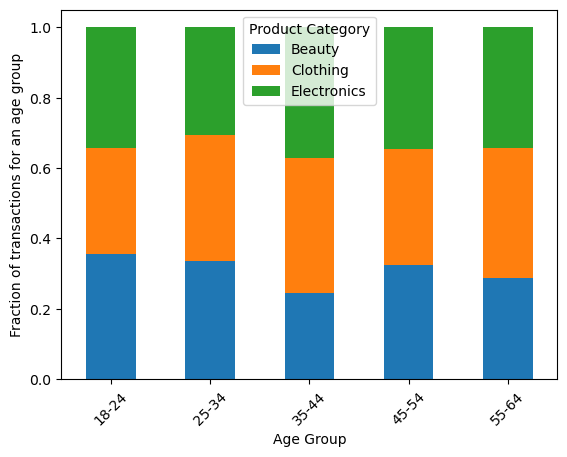

In [7]:
df_age_vs_category.plot(kind='bar', stacked=True, rot=45, ylabel="Fraction of transactions for an age group")